# Compute Integrated Vapor Transport IVT from u-, v- fluxes

This notebook loads the sample data (the u- and v- components of vertically integrated vapor fluxes) and compute the their magnitude: IVT.

In production you can use `compute_ivt.py` in the `scripts` folder for this step.


## Definition


IVT is simply defined as:

$IVT = \sqrt{u^2 + v^2}$, in $kg/(m \cdot s)$.

where:

* u: u-component of vertically integrated vapor fluxes (`standard_name`: `eastward_atmosphere_water_transport_across_unit_distance`), in $kg/(m \cdot s)$.
* v: v-component of vertically integrated vapor fluxes, (`standard_name`: `northward_atmosphere_water_transport_across_unit_distance`, in $kg/(m \cdot s)$.

## Input data

Some metadata of the sample data:

* Source: ERA-I Reanalysis data 
* Temporal resolution: 6-hourly instantaneous snapshots.
* Horizontal resolution: 0.75 x 0.75 degree latitude/longitude.
* Temporal domain: 1984-01-01 -- 1984-01-31
* Spatial domain: 10-80 N, 0-360 E.
* Data format: netCDF.
* Size of data: ~10 Mb each.

The sample was obtained from the ERA Interim data web interface at:
https://apps.ecmwf.int/datasets/data/interim-full-daily/levtype=sfc/. The variable name for `uflux` on the web interface is "Vertical integral of eastward water vapour flux", and `vflux` is "Vertical integral of northward water vapour flux". The temporal and spatial domain was set according to the metadata listed above.


## Steps


Execute the following code blocks in sequence.


## Results

It will read in the *uflux* and *vflux* files, print out their meta data, compute the IVT value.
If run successfully, a new netCDF data file (`ivt_s_6_1984_Jan.nc`) will be created, saving the computed IVT data.


In [10]:
%matplotlib inline
import os
import numpy as np
from ipart.utils import funcs

UFLUX_FILE=os.path.join('.', 'e-IVT-2022-06.nc')
VFLUX_FILE=os.path.join('.', 'n-IVT-2022-06.nc')
OUTPUTFILE=os.path.join('.', 'IVT-2022-06.nc')

if not os.path.exists(UFLUX_FILE):
    raise Exception('UFLUX_FILE not found. Please make sure you downloaded the data file and save to the same dir as the notebook file.')
if not os.path.exists(VFLUX_FILE):
    raise Exception('VFLUX_FILE not found. Please make sure you downloaded the data file and save to the same dir as the notebook file.')

In [11]:
#-----------Read in data----------------------
uflux=funcs.readNC(UFLUX_FILE, 'p71.162') # 'p71.162' is the id code for u-flux
vflux=funcs.readNC(VFLUX_FILE, 'p72.162') # 'p72.162' is the id code for v-flux
# uflux and vflux are ipart.utils.funcs.NCVAR objs, a rudimentary attempt to package data and metadata read
# by the netCDF4 package together.
# uflux.data gives the ndarray data array.

#-----------Print meta data------------------
print('\n######## Info of uflux ########')
print(uflux.info())


######## Info of uflux ########
### Description of slab ###
  id: p71.162
  shape: (120, 165, 201)
  filename: None
  missing_value: -32767
  comments: None
  grid_name: None
  grid_type: None
  long_name: Vertical integral of eastward water vapour flux
  units: kg m**-1 s**-1
  standard_name: None
  Order: ['time', 'latitude', 'longitude']
 
** Dimension 1 **
   calendar: gregorian
   isunlimited: False
   long_name: time
   units: hours since 1900-01-01 00:00:00.0
   length: 120
   1st: 2022-06-01 00:00:00
   lst: 2022-06-30 18:00:00
** Dimension 2 **
   isunlimited: False
   long_name: latitude
   units: degrees_north
   length: 165
   1st: -5.0
   lst: 36.0
** Dimension 3 **
   isunlimited: False
   long_name: longitude
   units: degrees_east
   length: 201
   1st: 60.0
   lst: 110.0
### End of description ###

None


In [12]:
print('Latitude of uflux:')
print(uflux.getLatitude())

Latitude of uflux:
[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75  6.    6.25  6.5   6.75
  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75
 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25 12.5  12.75
 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75 15.   15.25 15.5  15.75
 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75 18.   18.25 18.5  18.75
 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75 21.   21.25 21.5  21.75
 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75 24.   24.25 24.5  24.75
 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75 27.   27.25 27.5  27.75
 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75 30.   30.25 30.5  30.75
 31.   31.25 31.5  31.75 32.   32.25 32.5  32.75 33.   33.25 33.5  33.75
 34.   34.25 34.5  34.75 35.   3

In [13]:
print('Longitude of uflux:')
print(uflux.getLongitude())

Longitude of uflux:
[ 60.    60.25  60.5   60.75  61.    61.25  61.5   61.75  62.    62.25
  62.5   62.75  63.    63.25  63.5   63.75  64.    64.25  64.5   64.75
  65.    65.25  65.5   65.75  66.    66.25  66.5   66.75  67.    67.25
  67.5   67.75  68.    68.25  68.5   68.75  69.    69.25  69.5   69.75
  70.    70.25  70.5   70.75  71.    71.25  71.5   71.75  72.    72.25
  72.5   72.75  73.    73.25  73.5   73.75  74.    74.25  74.5   74.75
  75.    75.25  75.5   75.75  76.    76.25  76.5   76.75  77.    77.25
  77.5   77.75  78.    78.25  78.5   78.75  79.    79.25  79.5   79.75
  80.    80.25  80.5   80.75  81.    81.25  81.5   81.75  82.    82.25
  82.5   82.75  83.    83.25  83.5   83.75  84.    84.25  84.5   84.75
  85.    85.25  85.5   85.75  86.    86.25  86.5   86.75  87.    87.25
  87.5   87.75  88.    88.25  88.5   88.75  89.    89.25  89.5   89.75
  90.    90.25  90.5   90.75  91.    91.25  91.5   91.75  92.    92.25
  92.5   92.75  93.    93.25  93.5   93.75  94.    94.25 

In [14]:
print('Time axis of uflux:')
print(uflux.getTime())

Time axis of uflux:
[real_datetime(2022, 6, 1, 0, 0) real_datetime(2022, 6, 1, 6, 0)
 real_datetime(2022, 6, 1, 12, 0) real_datetime(2022, 6, 1, 18, 0)
 real_datetime(2022, 6, 2, 0, 0) real_datetime(2022, 6, 2, 6, 0)
 real_datetime(2022, 6, 2, 12, 0) real_datetime(2022, 6, 2, 18, 0)
 real_datetime(2022, 6, 3, 0, 0) real_datetime(2022, 6, 3, 6, 0)
 real_datetime(2022, 6, 3, 12, 0) real_datetime(2022, 6, 3, 18, 0)
 real_datetime(2022, 6, 4, 0, 0) real_datetime(2022, 6, 4, 6, 0)
 real_datetime(2022, 6, 4, 12, 0) real_datetime(2022, 6, 4, 18, 0)
 real_datetime(2022, 6, 5, 0, 0) real_datetime(2022, 6, 5, 6, 0)
 real_datetime(2022, 6, 5, 12, 0) real_datetime(2022, 6, 5, 18, 0)
 real_datetime(2022, 6, 6, 0, 0) real_datetime(2022, 6, 6, 6, 0)
 real_datetime(2022, 6, 6, 12, 0) real_datetime(2022, 6, 6, 18, 0)
 real_datetime(2022, 6, 7, 0, 0) real_datetime(2022, 6, 7, 6, 0)
 real_datetime(2022, 6, 7, 12, 0) real_datetime(2022, 6, 7, 18, 0)
 real_datetime(2022, 6, 8, 0, 0) real_datetime(2022, 6, 

In [15]:
print('######## Info of uflux ########')
print(vflux.info())

# Please note that your input data need to have proper latitude,
# longitude and time axes, like the uflux above.

######## Info of uflux ########
### Description of slab ###
  id: p72.162
  shape: (120, 165, 201)
  filename: None
  missing_value: -32767
  comments: None
  grid_name: None
  grid_type: None
  long_name: Vertical integral of northward water vapour flux
  units: kg m**-1 s**-1
  standard_name: None
  Order: ['time', 'latitude', 'longitude']
 
** Dimension 1 **
   calendar: gregorian
   isunlimited: False
   long_name: time
   units: hours since 1900-01-01 00:00:00.0
   length: 120
   1st: 2022-06-01 00:00:00
   lst: 2022-06-30 18:00:00
** Dimension 2 **
   isunlimited: False
   long_name: latitude
   units: degrees_north
   length: 165
   1st: -5.0
   lst: 36.0
** Dimension 3 **
   isunlimited: False
   long_name: longitude
   units: degrees_east
   length: 201
   1st: 60.0
   lst: 110.0
### End of description ###

None



# Saving output to:
 .\IVT-2022-06.nc


C:\Users\User\AppData\Local\Temp\ipykernel_18436\2219934425.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


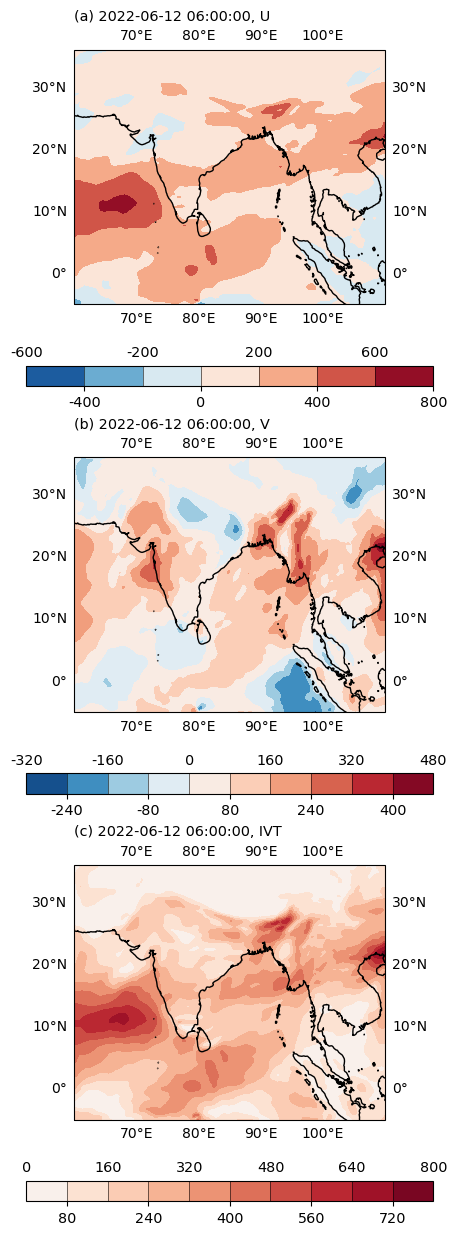

In [16]:
# compute ivt

ivt=np.ma.sqrt(uflux.data*uflux.data+vflux.data*vflux.data)
ivt=funcs.NCVAR(ivt, 'ivt', uflux.axislist, {'name': 'ivt', 'long_name': 'integrated vapor transport (IVT)',
                                            'standard_name': 'integrated_vapor_transport',
                                            'title': 'integrated vapor transport (IVT)',
                                            'units': getattr(uflux, 'units', '')})


#--------Save------------------------------------
print('\n# Saving output to:\n',OUTPUTFILE)
funcs.saveNC(OUTPUTFILE, ivt)

#------- Plot some figure -----------
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from ipart.utils import plot

figure=plt.figure(figsize=(7,15),dpi=100)
idx=45  # select the 101th time step from the beginning
time_str=uflux.getTime()[idx]

plot_vars=[uflux.data[idx], vflux.data[idx], ivt.data[idx]]
titles=['U', 'V', 'IVT']

for ii, vii in enumerate(plot_vars):
    axii=figure.add_subplot(3,1,ii+1,projection=ccrs.PlateCarree())
    iso=plot.Isofill(vii, 10, 1, 2, max_level= 800)
    plot.plot2(vii, iso, axii,
            title='%s, %s' %(str(time_str), titles[ii]),
            xarray=uflux.getLongitude(),
               yarray=uflux.getLatitude(),
            legend='local',
            fix_aspect=False)

figure.show()